In [135]:
import scipy.integrate
import numpy as np
import scipy.special as sp

from matplotlib import pyplot
from matplotlib.transforms import blended_transform_factory
%matplotlib inline

In [116]:
def Integrand(phi_r, phi, dSTAR, betaSTAR, sigmaSTAR):
    """
    computes the integrand
    """
    
    F1 = np.sin(phi_r)*(1 + np.cos(phi))*(1 - 2*dSTAR*np.sin(phi)) - np.pi*betaSTAR*(1 + np.cos(phi_r))
    F2 = -(np.sin(phi_r)*(1 + np.cos(phi))*(1 + 2*dSTAR*np.sin(phi)) + np.pi*betaSTAR*(1 + np.cos(phi_r)))
    F3 = np.sqrt(2)*np.pi*sigmaSTAR*(1 + np.cos(phi_r))
    
    Error = sp.erf(F1/F3) - sp.erf(F2/F3)
    
    Integrand = ((1+np.cos(phi_r))/(2*np.sin(phi_r))) * Error / (1 + np.cos(phi))
    
    return Integrand  

In [117]:
def Simpsons(lower, upper, phi_r, dSTAR, betaSTAR, sigmaSTAR):
    """
    computer the integrand
    """
    
    n = 20
    h = (upper - lower) / n
    
    s = Integrand(phi_r, lower, dSTAR, betaSTAR, sigmaSTAR) + Integrand(phi_r, upper, dSTAR, betaSTAR, sigmaSTAR)

    for i in range(1, n, 2):
        s += 4 * Integrand(phi_r, (lower + i*h), dSTAR, betaSTAR, sigmaSTAR)
    for i in range(2, n-1, 2):
        s += 2 * Integrand(phi_r, (lower + i*h), dSTAR, betaSTAR, sigmaSTAR)

    return s * h / 3

In [118]:
def InputsInterceptKalogirou(C, D):
    
    phi_r = np.deg2rad(90)
    beta = np.deg2rad(0.2)
    sigma = 0.00861
    dr_y = 0     # in mm
    
    sigmaSTAR = sigma*C
    betaSTAR = beta*C
    dSTAR = dr_y/D
    
    Integral = Simpsons(0, phi_r, phi_r, dSTAR, betaSTAR, sigmaSTAR)
    return Integral

In [119]:
def OpticalEfficiency(rho_m, tau_g, alpha_r, gamma):
    return rho_m*tau_g*alpha_r*gamma

In [120]:
def ThermalEfficiency(OpticalEfficiency, U_l, T_r, T_a, I, C):
    return OpticalEfficiency - (U_l * (T_r - T_a) / (I * C))

In [121]:
C = [42.44, 28.29, 21.22, 16.98, 14.15, 12.13]
D = [6, 9, 12, 15, 18, 21]
Intercept = []
Intercept1 = []
W = []

In [122]:
for i in range(0,6):
    Intercept.append(InputsInterceptKalogirou(C[i], D[i]))

In [123]:
print (Intercept)

[0.77900946476896837, 0.92328495975543212, 0.97597813847503634, 0.9930745499025484, 0.99820508952022247, 0.99959035417951492]


In [124]:
for i in range(0, 6):
    W.append(C[i] * np.pi * D[i])

In [125]:
print(W)

[799.9751533101048, 799.8809055304972, 799.9751533101048, 800.1636488693204, 800.1636488693204, 800.257896648928]


In [126]:
W = 1089.1
D = [6, 9, 12, 15, 18, 21, 24, 27]

C = []
for i in range(0,8):
    C.append(W/(np.pi * D[i]))

In [127]:
print (C)



[57.778549507127735, 38.519033004751826, 28.889274753563868, 23.111419802851096, 19.259516502375913, 16.508157002036494, 14.444637376781934, 12.839677668250609]


In [128]:
for i in range(0,8):
    Intercept1.append(InputsInterceptKalogirou(C[i], D[i]))

In [129]:
print (Intercept1)

[0.63791457449327083, 0.81972007577308148, 0.91776862194700071, 0.96455244288739517, 0.98537259789778309, 0.99424935880970677, 0.99786873921191888, 0.99926216747787644]


In [130]:
rho_m = 0.85
tau_g = 0.9
alpha_r = 0.9

I = 500
U_l = 7
T_r = 250+273
T_a = 32+273

O = []
T = []

In [131]:
for i in range(0, 8):
    O.append(OpticalEfficiency(rho_m, tau_g, alpha_r, Intercept1[i]))

In [132]:
print (O)

[0.43920418453861698, 0.56437727216976663, 0.63188369621050999, 0.66409435692797159, 0.67842903365262364, 0.68454068354048314, 0.68703262694740619, 0.68799200230851798]


In [133]:
for i in range(0, 8):
    T.append(ThermalEfficiency(O[i], U_l, T_r, T_a, I, C[i]))

In [134]:
print (T)

[0.38638181315624964, 0.48514371509621557, 0.5262389534457752, 0.53203842847205318, 0.51996191950552162, 0.49966238370219734, 0.47574314141793672, 0.45029133108786484]


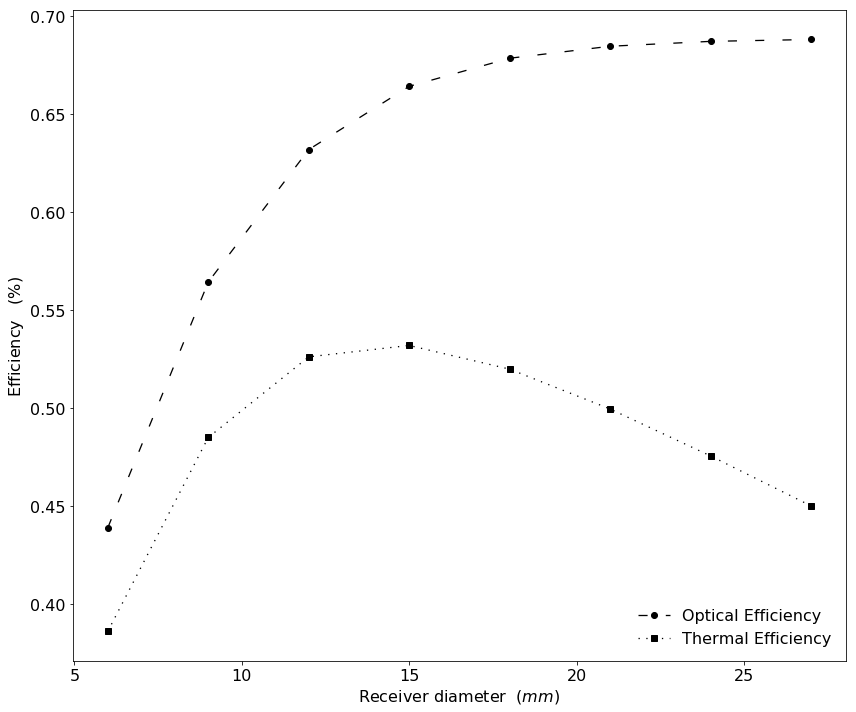

In [136]:
pyplot.figure(figsize=(12,10))
# pyplot.xlim(180, 1110)
# pyplot.ylim(0, 100)

pyplot.tick_params(axis='both', labelsize=16)
pyplot.xlabel('Receiver diameter  $(mm)$', fontsize=16)
pyplot.ylabel('Efficiency   $(\%)$', fontsize=16)

pyplot.plot(D, O, linewidth=1.3, color = 'black', linestyle=(0, (7, 14)), marker='o', label="Optical Efficiency")
pyplot.plot(D, T, linewidth=1.3, color = 'black', linestyle=(0, (1, 5)), marker='s', label="Thermal Efficiency")
# pyplot.plot(x, Y3, linewidth=1.3, color = 'black', linestyle=(0, (7, 20, 2, 20, 2, 20)), marker='^',markevery=120, label="0.0006   vol.%")
# pyplot.plot(x, Y4, linewidth=1.3, color = 'black', linestyle=(0, (2, 15)), marker='x',markevery=120, label="0.001     vol.%")
# pyplot.plot(x, Y5, linewidth=1.3, color = 'black', linestyle=(0, (8, 5, 1, 5, 1, 5)), marker='v',markevery=120, label="0.0054   vol.%")
# pyplot.plot(x, Y6, linewidth=1.3, color = 'black', linestyle=(0, (5, 25)), marker='^',markevery=120, label="0.0254   vol.%")

pyplot.legend(loc=4, prop={'size': 16}, frameon=False)

# pyplot.title('Al2O3 - Water: Transmittance', fontsize=16)
pyplot.tight_layout()

pyplot.savefig('Plot.png')